

<h1><mark># Week 5 - Bivariate Analysis
</mark></h1>

## Please run the cells of the notebook as you get to them while reading

In [ ]:
import pandas as pd # Handles tabular data
import numpy as np  # Handles numerical data
from datetime import datetime, timedelta # Handles dates and times
import seaborn as sns # Makes our plots look nicer


<h1><mark># 1. Lesson: Bivariate graphs
</mark></h1>

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [ ]:
np.random.seed(0) # Set seed for reproducibility
numpoints = 100 # Number of points to generate
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2) # Generate random data
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2) # Generate random data
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints) # Generates 100 random numbers, but squared (skewed toward lower values)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints) # Reverse of lesson_series_base (so when base is high, reverse is low), plus noise.

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<div style="background-color: #d4edda; padding: 10px; border-radius: 5px;">	

<h2><mark>Notes
</mark></h2>
•	A scatter plot helps visualize relationships between two variables.
	        
•	lesson_series_skewed and lesson_series_reverse should show a negative correlation (one increases while the other decreases).

<Axes: >

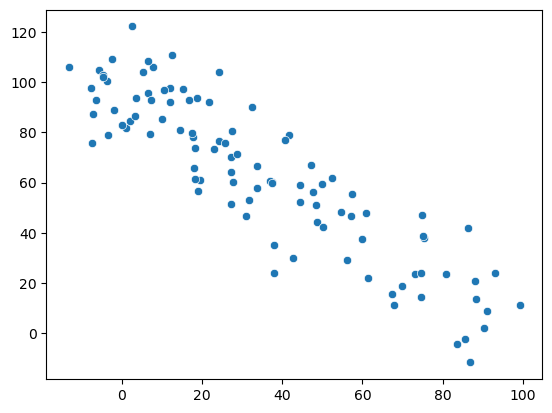

In [ ]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse) # Scatter Plot: Detecting Correlation

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [4]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

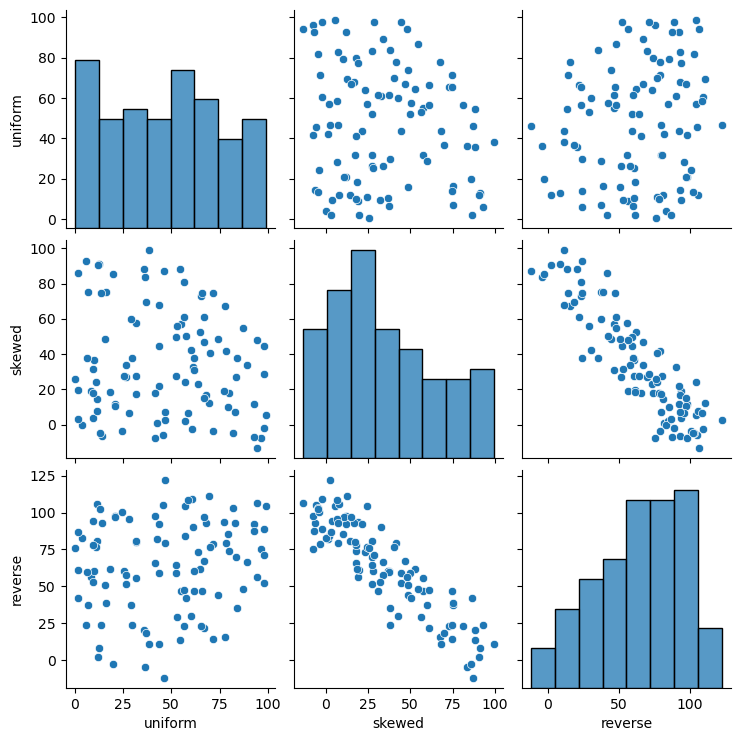

In [ ]:
sns.pairplot(df) # Comparing Multiple Variables

We can compute the correlation coefficience between each pair.

In [6]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


<div style="background-color: #d4edda; padding: 10px; border-radius: 5px;">

<h2><mark>Notes
</mark></h2>

## What is a Pair Plot?
- A **pair plot** creates scatter plots for each **pair of variables** in `df`.
- The **diagonal** shows **histograms** (since plotting a variable against itself makes no sense).
- If two variables are **correlated**, their scatter plot will show a **clear trend**.

---

## What is a Correlation?
- **Correlation (R)** measures how two variables move together.
- **Range:** \(-1 \leq R \leq 1\)
- **\(R > 0\)** → Variables **increase together** (**positive correlation**).
- **\(R < 0\)** → One **increases**, the other **decreases** (**negative correlation**).
- **\(R \approx 0\)** → No clear relationship.

### **Formula for Correlation:**

$$
R = \frac{\sum_{i=1}^{n} (X_i - \bar{X}) (Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \times \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

where:
 $$
X_i, Y_i \text{ are the individual data points.}
$$

$$
\bar{X}, \bar{Y} \text{ are the means of } X \text{ and } Y.
$$

$$
\text{The numerator represents the covariance.}
$$

$$
\text{The denominator normalizes the covariance by the standard deviations of } X \text{ and } Y.
$$

---



This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

**Q: What is a correlation telling us?**

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

**Q: How do you decide if a correlation is strong?**

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

**Q: What is the purpose of finding a correlation?**

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [7]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_77529/2082488306.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

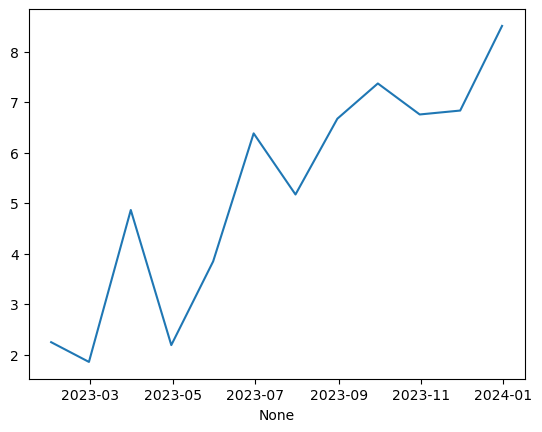

In [ ]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M') # Generate a range of dates
sns.lineplot(x = datearray, y = time_series) # Line Plot: Time Series

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

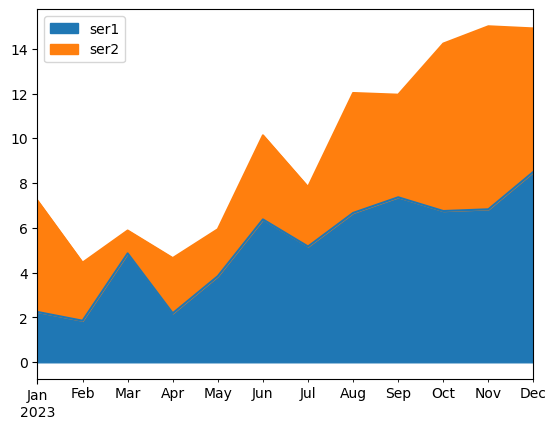

In [9]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()


<h1><mark># 2. Weekly graph question
</mark></h1>

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  
- If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  
- How would you alter the way these graphs are displayed to make them clearer or more informative?  
- Would you fit any of these graphs to a line or curve? 
- Why or why not?  
- What if you had to choose just _one_?  
- What if you had to choose _six_?

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

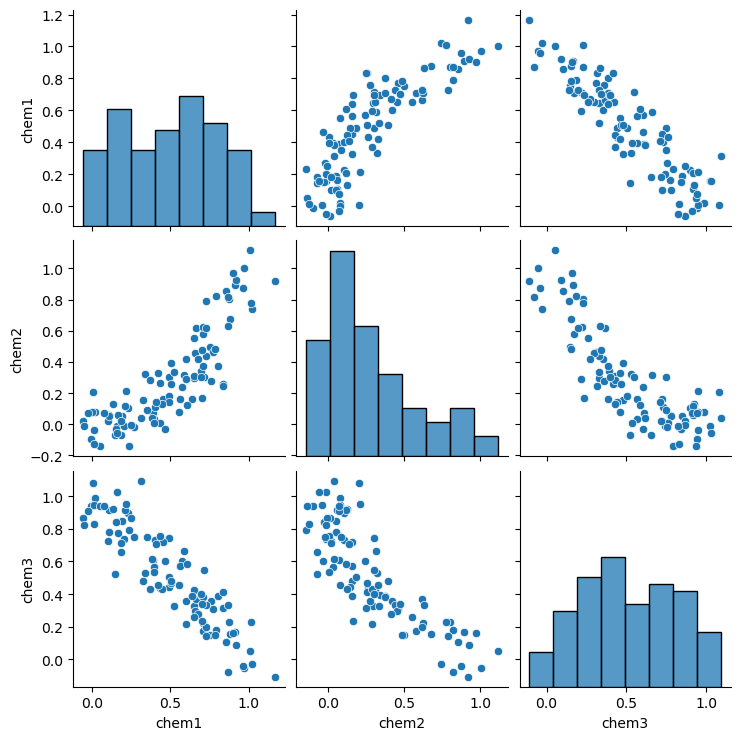

In [11]:
sns.pairplot(df_chem)

<div style="background-color: #d4edda; padding: 10px; border-radius: 5px;">

<h2><mark>Answer
</mark></h2>


## 🔬 Analyzing the Pair Plot and Selecting Key Graphs

### **1️⃣ Understanding the Pair Plot**
The pair plot visualizes **pairwise relationships** between the levels of **chemical A (chem1), B (chem2), and C (chem3)** in a water sample. It consists of:
- **Histograms on the diagonal** (representing the distribution of each chemical).
- **Scatter plots in the off-diagonal** positions, comparing each chemical to the others.

---

## **2️⃣ Choosing Three Key Graphs**
If I could choose only **three** out of the nine graphs, we would focus on:
1. **`chem1 vs. chem2` scatter plot** → Checks if chemical A and B have a relationship.
2. **`chem1 vs. chem3` scatter plot** → Determines if chemical A is related to C.
3. **`chem2 vs. chem3` scatter plot** → Examines the relationship between chemicals B and C.

### **📊 How to Improve These Graphs**
- **Increase point transparency (`alpha`)**: Helps avoid overplotting.
- **Use regression lines (`sns.regplot`)**: Shows correlation trends.
- **Use color coding**: Different colors for overlapping points.

```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generates Data
np.random.seed(0)
num_data = 100
base_data = np.random.random(size=num_data)
chem1 = base_data + np.random.normal(size=num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size=num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size=num_data) * 0.1
df_chem = pd.DataFrame({'chem1': chem1, 'chem2': chem2, 'chem3': chem3})

# Plot selected scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_chem["chem1"], y=df_chem["chem2"], alpha=0.7, ax=axes[0])
sns.scatterplot(x=df_chem["chem1"], y=df_chem["chem3"], alpha=0.7, ax=axes[1])
sns.scatterplot(x=df_chem["chem2"], y=df_chem["chem3"], alpha=0.7, ax=axes[2])

axes[0].set_title("Chemical A vs. Chemical B")
axes[1].set_title("Chemical A vs. Chemical C")
axes[2].set_title("Chemical B vs. Chemical C")

plt.tight_layout()
plt.show()



<h1><mark># 3. Homework - Reproducing Pair Plot Graphs
</mark></h1>

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

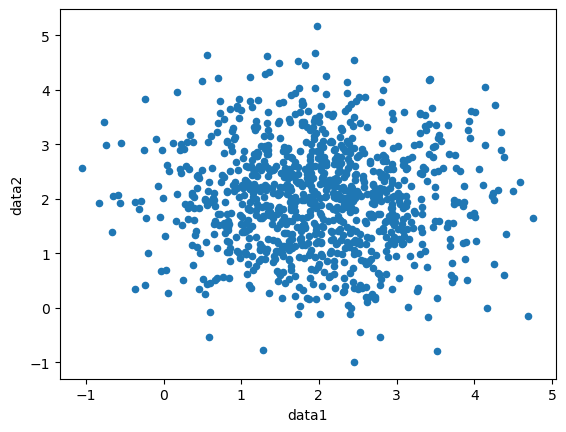

In [12]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

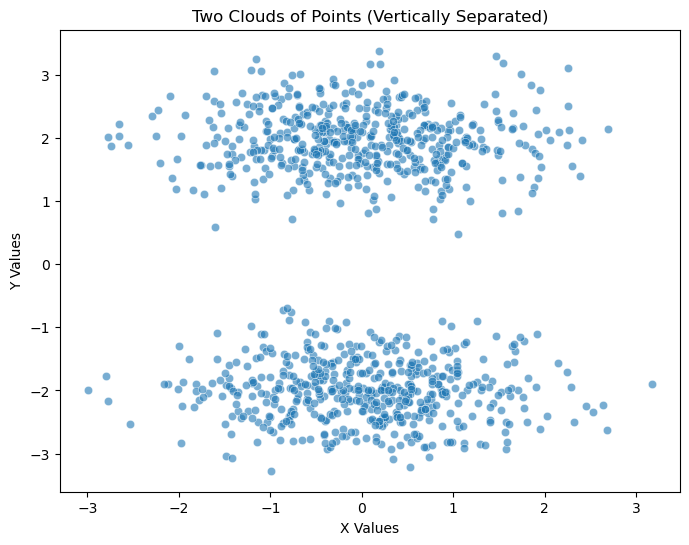

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(0)

# Number of points per cloud
num_points = 500  

# First cloud: centered around (0, 2)
x1 = np.random.normal(loc=0, scale=1, size=num_points)
y1 = np.random.normal(loc=2, scale=0.5, size=num_points)  # Upper cluster

# Second cloud: centered around (0, -2)
x2 = np.random.normal(loc=0, scale=1, size=num_points)
y2 = np.random.normal(loc=-2, scale=0.5, size=num_points)  # Lower cluster

# Combine into a DataFrame
df_twoclouds = pd.DataFrame({
    "x": np.concatenate([x1, x2]),
    "y": np.concatenate([y1, y2])
})

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_twoclouds, x="x", y="y", alpha=0.6)
plt.title("Two Clouds of Points (Vertically Separated)")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

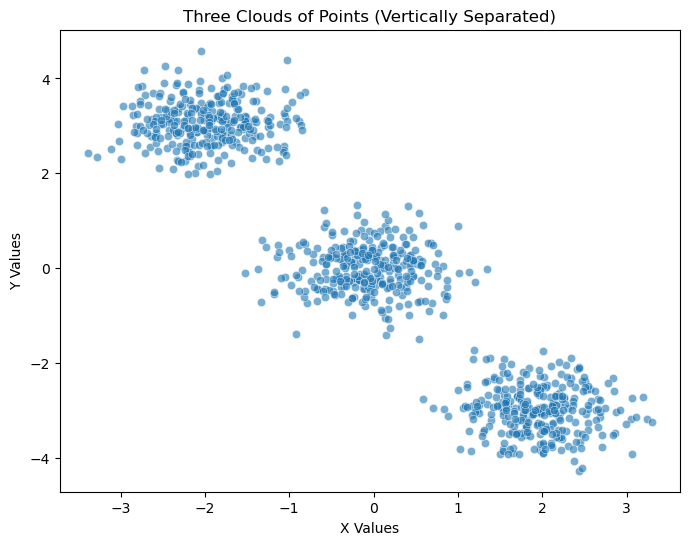

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(0)

# Number of points per cloud
num_points = 300  

# Generate x-values for each cloud
x1 = np.random.normal(loc=-2, scale=0.5, size=num_points)  # Left cluster
x2 = np.random.normal(loc=0, scale=0.5, size=num_points)   # Middle cluster
x3 = np.random.normal(loc=2, scale=0.5, size=num_points)   # Right cluster

# Generate y-values for each cloud
y1 = np.random.normal(loc=3, scale=0.5, size=num_points)   # Top cloud
y2 = np.random.normal(loc=0, scale=0.5, size=num_points)   # Middle cloud
y3 = np.random.normal(loc=-3, scale=0.5, size=num_points)  # Bottom cloud

# Combine into a DataFrame
df_threeclouds = pd.DataFrame({
    "x": np.concatenate([x1, x2, x3]),
    "y": np.concatenate([y1, y2, y3])
})

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_threeclouds, x="x", y="y", alpha=0.6)
plt.title("Three Clouds of Points (Vertically Separated)")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

<div style="background-color: #d4edda; padding: 10px; border-radius: 5px;">

<h2><mark>Answer
</mark></h2>

## 🔬 Will There Be a Correlation?

- Since the data forms **three separate clouds**, `x` does **not consistently predict** `y`.
- We expect **little to no correlation** because there is **no clear trend**.
- Let's test it with `.corr()`.

In [30]:

# Compute correlation
correlation = df_threeclouds["x"].corr(df_threeclouds["y"])
print(f"Correlation coefficient (R): {correlation:.4f}")

Correlation coefficient (R): -0.9386


<div style="background-color: #d4edda; padding: 10px; border-radius: 5px;">

### **📊 Expected Outcome**
- If `R ≈ 0`: No correlation (most likely).
- If `R > 0`: Positive trend (unlikely).
- If `R < 0`: Negative trend (unlikely).

🚀 **Final Answer:** We expect **R ≈ 0**, confirming no strong relationship.

Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

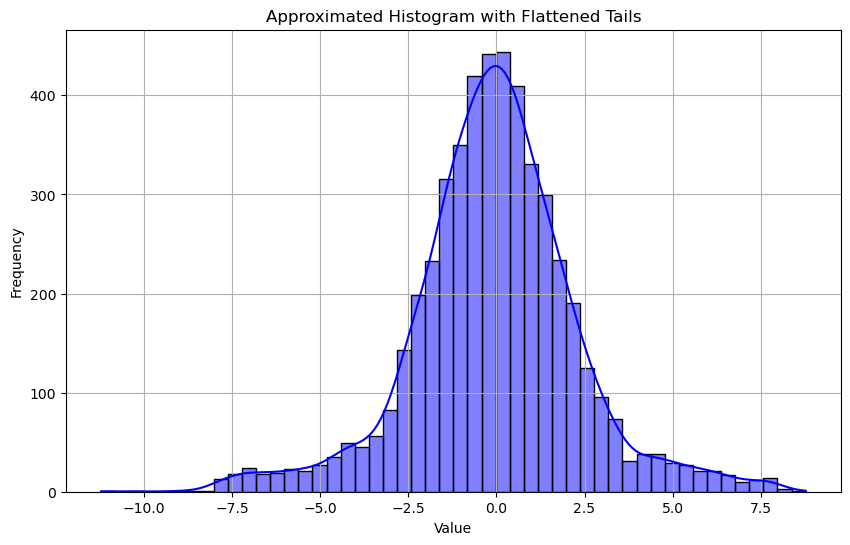

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(0)

# Number of data points
num_points = 5000  

# Main normal distribution (centered around 0, wider spread)
main_dist = np.random.normal(loc=0, scale=1.5, size=int(num_points * 0.7))

# Secondary normal distribution (more spread out for flattened tails)
secondary_dist = np.random.normal(loc=0, scale=3.0, size=int(num_points * 0.2))

# Uniform component (to prevent the tails from going to zero)
uniform_dist = np.random.uniform(low=-8, high=8, size=int(num_points * 0.1))

# Combine the distributions
final_data = np.concatenate([main_dist, secondary_dist, uniform_dist])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(final_data, bins=50, kde=True, color="blue", edgecolor="black")

# Formatting
plt.title("Approximated Histogram with Flattened Tails")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).